In [53]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{tgheros}',
                                       r'\usepackage{sansmath}',
                                       r'\sansmath',
                                       r'\usepackage{siunitx}',
                                       r'\sisetup{detect-all}']
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'font.size':28})

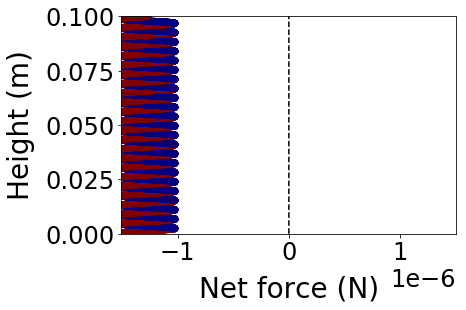

In [131]:
# Calculation for array of transducers (first assume as a plane wave) aimed downard 
# at a reflector. Find actual net force on a small sphere in there, and relate to 
# microphone voltage via sensitivity to assess whether we can trap 

# Input parameters
numPoints=10000 #Sample points
f  = 40*10**3# driving frequency (Hz)
cm = 343   # medium sound speed (m/s)    
k  = (2*np.pi)/(cm/f)
micSens = 5.6*10**(-3) # V/Pa # Calculated from spec on Tinkersphere site
d  = .1 # Array-reflector spacing (m) 
z  = np.linspace(0,d,numPoints)
R  = 1 # pressure reflection coefficient
a  = 10**(-3) # particle radius (m)
rhom= 1.225 # air density (kg/m**3)
rhop = 32 # density of EPS, high estimate
cp =  2350 #sound speed, polystyrene

f0 = 1 - (rhom*cm**2)/(rhop*cp**2)
f1 = 2*(rhop-rhom)/(2*rhop+rhom)

alphap = 4*np.pi*a**3/(3*rhom*cm**2)*(-f0)
betap  = (2*np.pi*a**3)/(rhom*cm**2*k**2)*(f1)

g = 9.81

p0=14 * 5 * 6 * 16 * 5 # transducer output pressure, Pa (need to determine this)
## Standing wave field
# Solving v=0 BCs at z=0 and z=d, for reflection coefficient R,
# get the total pressure field as
pTotal = p0* 2*R * np.cos(k*(z-d) ) * np.exp(-1j*k*d)
am     = np.abs  ( pTotal )
ph     = np.angle( pTotal )
fSound  = (1/4) * np.gradient( alphap * am**2 + betap * np.dot(np.gradient(am),np.gradient(am))) #acoustic force
fGrav = -( (4/3)*np.pi*a**(3)*(rhop-rhom)*g)

fNet = fSound+fGrav
maxForce = np.amax(np.abs(fNet))

plt.scatter(fNet,z,c= np.sign(np.gradient(fNet)) ,cmap='jet')
plt.plot(np.zeros(numPoints),z,color='black',linestyle='--')
plt.ylim([0,d])
plt.xlabel('Net force (N)')
plt.ylabel('Height (m)')
plt.xlim([-maxForce,maxForce])
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
plt.show() 

In [114]:
print f0,f1
print alphap, k**2 * betap
print alphap - k**2 * betap

0.999184472471 0.9436565734
-2.90408923469e-14 4.11404946468e-14
-7.01813869937e-14
